In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [4]:
df = data[data["Visit"] == 1]
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [5]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
df['SES']= df['SES'].fillna(data['SES'].mean())
    

<ipython-input-6-de35f1517ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES']= df['SES'].fillna(data['SES'].mean())


In [7]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
df=df.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'Hand'], axis=1) 
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...
359,Demented,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
361,Nondemented,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,Demented,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,Demented,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [9]:
clean = df.copy()
data_binary_encoded = pd.get_dummies(clean, columns=["M/F"])
data_binary_encoded.head()


,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [10]:
data_binary_encoded=data_binary_encoded.rename(columns={'M/F_M':'Male','M/F_F':'Female'})
data_binary_encoded

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,Demented,73,12,2.460452,23.0,0.5,1661,0.698,1.056,0,1
361,Nondemented,66,13,2.000000,30.0,0.0,1495,0.746,1.174,1,0
365,Demented,72,16,3.000000,24.0,0.5,1354,0.733,1.296,1,0
367,Demented,80,16,1.000000,28.0,0.5,1704,0.711,1.030,0,1


In [11]:
# Assign X (data) and y (target = DEMENTED/NOT)

X = data_binary_encoded.drop("Group", axis=1)
y = data_binary_encoded["Group"]
print(X.shape, y.shape)

(150, 10) (150,)


In [12]:
# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# LOGISTIC REGRESSION 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [14]:
# Fit (train) or model using the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9107142857142857
Testing Data Score: 0.868421052631579


In [16]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Demented' 'Demented']
First 10 Actual labels: ['Converted', 'Nondemented', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented', 'Converted', 'Demented', 'Demented']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Converted
1,Nondemented,Nondemented
2,Nondemented,Converted
3,Nondemented,Nondemented
4,Nondemented,Nondemented
5,Nondemented,Nondemented
6,Demented,Nondemented
7,Nondemented,Converted
8,Demented,Demented
9,Demented,Demented


In [18]:
# SVM

target = data_binary_encoded["Group"]
target_names = ["Demented", "Nondemented", "Converted"]

In [19]:
data = data_binary_encoded.drop("Group", axis=1).reset_index(drop=True)
feature_names = data.columns
data.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
3,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
4,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [21]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Test Accuracy: 0.842


In [23]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         6
 Nondemented       1.00      1.00      1.00        15
   Converted       0.74      1.00      0.85        17

    accuracy                           0.84        38
   macro avg       0.58      0.67      0.62        38
weighted avg       0.73      0.84      0.78        38

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib

In [24]:
from sklearn import tree

In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7894736842105263

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.8421052631578947
1.0


In [27]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.41763733675906545, 'CDR'),
 (0.23150079494223108, 'MMSE'),
 (0.06419045895030233, 'Age'),
 (0.05658893298623804, 'ASF'),
 (0.054500469014184795, 'eTIV'),
 (0.05285584735701053, 'nWBV'),
 (0.04796105518884297, 'EDUC'),
 (0.039308245982577754, 'SES'),
 (0.019160700077396533, 'Male'),
 (0.016296158742150416, 'Female')]

In [36]:
# OVERSAMPLING

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [40]:
# define dataset

X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

In [41]:
# summarize class distribution
print(Counter(y))

Counter({0: 9900, 1: 100})


In [42]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [43]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [44]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 9900})


In [46]:
# PCA

# standardize data
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 0.59192693,  0.90304657, -0.93280393, ...,  1.54339586,
        -1.10092892, -0.78278095],
       [-1.05257578,  0.25424359,  0.42103285, ..., -0.20403662,
         0.38086409,  1.3098947 ],
       [-0.36018222,  0.41350543, -0.66290608, ...,  0.00667924,
        -1.87323897, -0.25365958],
       ...,
       [ 1.68135261,  1.04092934, -0.43372557, ..., -0.63744163,
         2.98744008, -1.36595808],
       [-0.76338554,  0.41384046,  1.17722478, ..., -0.04091678,
        -0.90433732,  0.86346039],
       [ 0.5206528 , -0.2836588 , -1.67833644, ..., -0.24421248,
         1.50384186, -0.73955154]])

In [51]:
cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 5.72206409e-01 -8.01912204e-01  1.58254925e-01  4.04226032e-03
  -3.97764866e-03  4.26241713e-02 -1.54985494e-02 -1.97931335e-02
  -2.38387857e-02 -2.62513350e-02  1.19444226e-02 -4.33170458e-02
  -1.62992113e-02 -4.00215731e-03 -6.70363631e-03 -8.47971430e-03
  -2.41553983e-02  1.77463509e-02 -3.37439068e-02 -4.73945295e-03]
 [-8.65595165e-03  1.95166834e-16  2.22248990e-17 -1.50922614e-01
   2.97097333e-01 -8.91752193e-02 -2.16879334e-01  2.03680105e-01
  -1.60902690e-01 -1.68779452e-02 -2.74786357e-01 -2.44715257e-01
  -2.25501770e-01  1.08672345e-02  2.49454975e-01 -3.74180949e-01
   2.75191696e-01 -8.68589119e-02 -1.52410504e-01  5.20697907e-01]
 [ 4.58143044e-03  2.27307819e-17  1.01152355e-16 -9.44640956e-02
   2.14109380e-01 -5.47128328e-02  3.46353209e-01 -2.56703391e-01
   1.73033652e-01 -3.12150426e-01 -3.12724650e-01 -6.77038643e-02
  -2.85439587e-02 -1.66859167e-01  2.23624955e-01  5.65194769e-01
   2.39848768e-01  1.83709827e-01 -1.78055861e-01  7.4245453

In [54]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))] 
print(type(eig_pairs)) 

<class 'list'>


In [55]:
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 


 [(0.9792589824651896, array([-0.00473945,  0.52069791,  0.07424545,  0.09839409,  0.28662192,
       -0.44476601,  0.07703713, -0.21509501, -0.02555922, -0.10122727,
       -0.00753407, -0.25650188,  0.09458569, -0.18955825, -0.17482725,
       -0.22894712,  0.17303099,  0.14171135,  0.35468256,  0.03249674])), (0.9832738817425837, array([-0.03374391, -0.1524105 , -0.17805586,  0.53846777, -0.04855641,
       -0.13730725,  0.29237227, -0.03514545,  0.15834776, -0.09156794,
       -0.01391861,  0.52743137,  0.1637968 , -0.0395004 , -0.13279469,
        0.27222125,  0.15995058, -0.08471093,  0.2482746 ,  0.14031397])), (0.9903421840702893, array([ 0.01774635, -0.08685891,  0.18370983, -0.23105355,  0.53355865,
        0.05626387, -0.26377734,  0.15283334, -0.10670627,  0.0088658 ,
        0.02438279,  0.12560268,  0.25121814, -0.30137104, -0.06785461,
        0.45608421, -0.18612818, -0.17042   ,  0.23107705, -0.11290616])), (0.9948868807672762, array([-0.0241554 ,  0.2751917 ,  0.2398

In [56]:
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])




Eigenvalues in descending order:
0.9792589824651896
0.9832738817425837
0.9903421840702893
0.9948868807672762
1.0008654717123715
1.0073961953777837
0.9704523267423973
1.0148729468892257
0.9614999333040658
0.9523162712306945
0.9456743836229672
1.0338860676484083
1.0342950074758055
1.0413334834032253
0.9238179460898985
1.0646175301770504
1.073109521062845
2.8804890188058505e-16
7.024799669372445e-16
3.030101186237924


In [57]:
tot = sum(eig_vals) 
print("\n",tot) 


 20.002000200019996


In [58]:
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 



1. Variance Explained
 [15.148990880596505, 5.365011050553695, 5.3225553421201655, 5.206146750274426, 5.170957889875291, 5.168913395208219, 5.073857297972685, 5.0364772787912315, 5.003826925826003, 4.973936960395998, 4.951215749259412, 4.915877771772049, 4.895805282834717, 4.851776407548617, 4.8070189165536785, 4.761105198017859, 4.7278990809230255, 4.618627821476449, 1.4401004849519854e-15, -3.512048594702755e-15]


In [59]:
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))



2. Cumulative Variance Explained
 [ 15.14899088  20.51400193  25.83655727  31.04270402  36.21366191
  41.38257531  46.45643261  51.49290989  56.49673681  61.47067377
  66.42188952  71.33776729  76.23357258  81.08534898  85.8923679
  90.6534731   95.38137218 100.         100.         100.        ]


3. Percentage of variance the first two principal components each contain
  [15.148990880596505, 5.365011050553695]


4. Percentage of variance the first two principal components together contain
 20.5140019311502


In [63]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(20,1), eig_pairs[1][1].reshape(20,1))) 
#hstack: Stacks arrays in sequence horizontally (column wise). print('Matrix W:\n', matrix_w)

[-0.00473945  0.52069791  0.07424545  0.09839409  0.28662192 -0.44476601
  0.07703713 -0.21509501 -0.02555922 -0.10122727 -0.00753407 -0.25650188
  0.09458569 -0.18955825 -0.17482725 -0.22894712  0.17303099  0.14171135
  0.35468256  0.03249674]
[-0.03374391 -0.1524105  -0.17805586  0.53846777 -0.04855641 -0.13730725
  0.29237227 -0.03514545  0.15834776 -0.09156794 -0.01391861  0.52743137
  0.1637968  -0.0395004  -0.13279469  0.27222125  0.15995058 -0.08471093
  0.2482746   0.14031397]


In [64]:
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.00473945 -0.03374391]
 [ 0.52069791 -0.1524105 ]
 [ 0.07424545 -0.17805586]
 [ 0.09839409  0.53846777]
 [ 0.28662192 -0.04855641]
 [-0.44476601 -0.13730725]
 [ 0.07703713  0.29237227]
 [-0.21509501 -0.03514545]
 [-0.02555922  0.15834776]
 [-0.10122727 -0.09156794]
 [-0.00753407 -0.01391861]
 [-0.25650188  0.52743137]
 [ 0.09458569  0.1637968 ]
 [-0.18955825 -0.0395004 ]
 [-0.17482725 -0.13279469]
 [-0.22894712  0.27222125]
 [ 0.17303099  0.15995058]
 [ 0.14171135 -0.08471093]
 [ 0.35468256  0.2482746 ]
 [ 0.03249674  0.14031397]]


In [65]:
# projection onto the new feature space

Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-0.456682,-1.168668
1,1.175870,0.262180
2,-0.017453,-0.584101
3,0.891889,-1.878507
4,0.681435,0.548744


In [76]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['Group'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,Group
0,-0.456682,-1.168668,0
1,1.175870,0.262180,0
2,-0.017453,-0.584101,0
3,0.891889,-1.878507,0
4,0.681435,0.548744,1


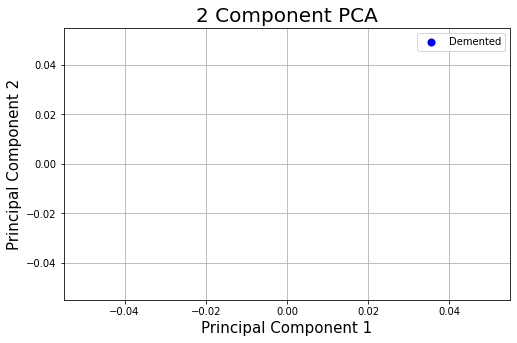

In [78]:
# visualize 2D Projection

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['Group'] == target  

ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50) 
ax.legend(targets) 
ax.grid()

In [80]:
# use of Python library to directly compute Principal Components

from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [81]:
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,0.887653,0.108022
1,-1.684698,0.673312
2,-0.963298,-0.945207
3,0.398579,0.420155
4,-0.796240,-0.877539


In [82]:
finalDf = pd.concat([principalDf, data_binary_encoded[['Group']]], axis = 1) 
finalDf.head(5)

,principal component 1,principal component 2,Group
0,0.887653,0.108022,Nondemented
1,-1.684698,0.673312,NaN
2,-0.963298,-0.945207,Demented
3,0.398579,0.420155,NaN
4,-0.796240,-0.877539,NaN
